In [ ]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img 

Using TensorFlow backend.


In [ ]:
path = '/content/drive/My Drive/Pix2pix/maps/train/'

src_list, tar_list = list(), list()
for filename in listdir(path):
  pixels = load_img(path + filename, target_size=(256,512))
  pixels = img_to_array(pixels)
  sat_img, map_img = pixels[:, :256], pixels[:, 256:]
  src_list.append(sat_img)
  tar_list.append(map_img)
  src_images = asarray(src_list)
  tar_images = asarray(tar_list)

print('Loaded: ', src_images.shape, tar_images.shape)

Loaded:  (1096, 256, 256, 3) (1096, 256, 256, 3)


In [ ]:
from matplotlib import pyplot

In [ ]:
src_images = (src_images - 127.5) / 127.5
tar_images = (tar_images - 127.5) / 127.5

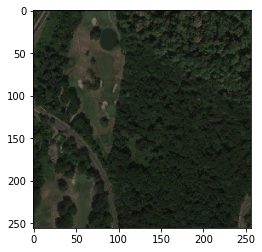

In [ ]:
temp = (src_images[0]+1)/2.0
pyplot.imshow(temp)

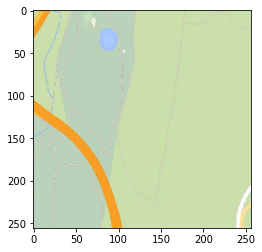

In [ ]:
temp = (tar_images[0] + 1) / 2.0
pyplot.imshow(temp)

In [ ]:
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU


In [ ]:
# weight initialization
init = RandomNormal(stddev=0.02)
# source image input
in_src_image = Input(shape=(256,256,3))
# target image input
in_target_image = Input(shape=(256,256,3))
# concatenate images channel-wise
merged = Concatenate()([in_src_image, in_target_image])
# C64
d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
d = LeakyReLU(alpha=0.2)(d)
# C128
d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
d = BatchNormalization()(d)
d = LeakyReLU(alpha=0.2)(d)
# C256
d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
d = BatchNormalization()(d)
d = LeakyReLU(alpha=0.2)(d)
# C512
d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
d = BatchNormalization()(d)
d = LeakyReLU(alpha=0.2)(d)
# second last output layer
d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
d = BatchNormalization()(d)
d = LeakyReLU(alpha=0.2)(d)
# patch output
d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
patch_out = Activation('sigmoid')(d)
# define model
discriminator = Model([in_src_image, in_target_image], patch_out)
# compile model
opt = Adam(lr=0.0002, beta_1=0.5)
# to make learning og D slow we have 0.5 weight on loss
discriminator.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[1])

In [ ]:
discriminator.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
concatenate_33 (Concatenate)    (None, 256, 256, 6)  0           input_17[0][0]                   
                                                                 input_18[0][0]                   
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 128, 128, 64) 6208        concatenate_33[0][0]      

In [ ]:
# define the standalone 
init = RandomNormal(stddev=0.02)
# image input
in_image = Input(shape=(256,256,3))
# encoder model
e1 = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
e1 = LeakyReLU(alpha=0.2)(e1)

e2 = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e1)
e2 = BatchNormalization()(e2, training=True)
e2 = LeakyReLU(alpha=0.2)(e2)

e3 = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e2)
e3 = BatchNormalization()(e3, training=True)
e3 = LeakyReLU(alpha=0.2)(e3)


#e4 = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e3)
#e4 = BatchNormalization()(e4, training=True)
#e4 = LeakyReLU(alpha=0.2)(e4)


#e5 = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e4)
#e5 = BatchNormalization()(e5, training=True)
#e5 = LeakyReLU(alpha=0.2)(e5)


#e6 = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e5)
#e6 = BatchNormalization()(e6, training=True)
#e6 = LeakyReLU(alpha=0.2)(e6)


#e7 = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e6)
#e7 = BatchNormalization()(e7, training=True)
#e7 = LeakyReLU(alpha=0.2)(e7)

# bottleneck, no batch norm and relu
#b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
#b = Activation('relu')(b)



# decoder model
#d1 = Conv2DTranspose(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(b)
# add batch normalization
#d1 = BatchNormalization()(d1, training=True)
#d1 = Dropout(0.5)(d1, training=True)
# merge with skip connection
#d1 = Concatenate()([d1, e7])
# relu activation
#d1 = Activation('relu')(d1)


#d2 = Conv2DTranspose(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d1)
# add batch normalization
#d2 = BatchNormalization()(d2, training=True)
#d2 = Dropout(0.5)(d2, training=True)
# merge with skip connection
#d2 = Concatenate()([d2, e6])
# relu activation
#d2 = Activation('relu')(d2)


#d3 = Conv2DTranspose(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d2)
# add batch normalization
#d3 = BatchNormalization()(d3, training=True)
#d3 = Dropout(0.5)(d3, training=True)
# merge with skip connection
#d3 = Concatenate()([d3, e5])
# relu activation
#d3 = Activation('relu')(d3)


#d4 = Conv2DTranspose(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e4)
# add batch normalization
#d4 = BatchNormalization()(d4, training=True)
# merge with skip connection
#d4 = Concatenate()([d4, e4])
# relu activation
#d4 = Activation('relu')(d4)


#d5 = Conv2DTranspose(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e4)
# add batch normalization
#d5 = BatchNormalization()(d5, training=True)
# merge with skip connection
#d5 = Concatenate()([d5, e3])
# relu activation
#d5 = Activation('relu')(d5)


d6 = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e3)
# add batch normalization
d6 = BatchNormalization()(d6, training=True)
# merge with skip connection
d6 = Concatenate()([d6, e2])
# relu activation
d6 = Activation('relu')(d6)


d7 = Conv2DTranspose(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d6)
# add batch normalization
d7 = BatchNormalization()(d7, training=True)
# merge with skip connection
d7 = Concatenate()([d7, e1])
# relu activation
d7 = Activation('relu')(d7)

# output
g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
out_image = Activation('tanh')(g)
# define model
generator = Model(in_image, out_image)

In [ ]:
generator.summary()

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_83 (Conv2D)              (None, 128, 128, 64) 3136        input_25[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_73 (LeakyReLU)      (None, 128, 128, 64) 0           conv2d_83[0][0]                  
__________________________________________________________________________________________________
conv2d_84 (Conv2D)              (None, 64, 64, 128)  131200      leaky_re_lu_73[0][0]             
___________________________________________________________________________________________

In [ ]:
discriminator.trainable = False
# define the source image
in_src = Input(shape=(256,256,3))
# connect the source image to the generator input
gen_out = generator(in_src)
# connect the source input and generator output to the discriminator input
dis_out = discriminator([in_src, gen_out])
# src image as input, generated image and classification output
gan = Model(in_src, [dis_out, gen_out])
# compile model
opt = Adam(lr=0.0002, beta_1=0.5)
gan.compile(loss=['binary_crossentropy', 'mse'], optimizer=opt, loss_weights=[1,50])

In [ ]:
gan.summary()

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
model_18 (Model)                (None, 256, 256, 3)  1453955     input_26[0][0]                   
__________________________________________________________________________________________________
model_13 (Model)                (None, 16, 16, 1)    6968257     input_26[0][0]                   
                                                                 model_18[1][0]                   
Total params: 8,422,212
Trainable params: 1,452,803
Non-trainable params: 6,969,409
__________________________________________________________________________________________________


In [ ]:
for i in range(4):
		# enumerate batches over the training set
  for j in range(1096//32):
    # get randomly selected 'real' samples

    ix = randint(0, 1096, 16)
    # select images and labels
    X_realA, X_realB = src_images[ix], tar_images[ix]

    # generate class labels
    y_real = ones((16, 16, 16, 1))

    # update discriminator model weights

    discriminator.trainable = True
    d_loss1 = discriminator.train_on_batch([X_realA, X_realB], y_real)
    # generate 'fake' examples



    X_fakeB = generator.predict(X_realA)
    # create class labels
    y_fake = zeros((16, 16, 16, 1))


    # update discriminator model weights
    d_loss2 = discriminator.train_on_batch([X_realA, X_fakeB], y_fake)
    # prepare points in latent space as input for the generator

    discriminator.trainable = False

    ix = randint(0, 1096, 32)
    X_realA, X_realB = src_images[ix], tar_images[ix]
    X_fakeB = generator.predict(X_realA)
    y_real = ones((32, 16, 16, 1))
    # update the generator via the discriminator's error
    g_loss, _, _ = gan.train_on_batch(X_fakeB, [y_real, X_realB])
    # summarize loss on this batch
    print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
      (i+1, j+1, 1096//32, d_loss1, d_loss2, g_loss))
# save the generator model

>1, 1/34, d1=0.001, d2=0.003 g=32.763
>1, 2/34, d1=0.001, d2=0.002 g=30.234
>1, 3/34, d1=0.001, d2=0.002 g=29.299
>1, 4/34, d1=0.001, d2=0.002 g=27.814
>1, 5/34, d1=0.002, d2=0.002 g=26.234
>1, 6/34, d1=0.001, d2=0.002 g=24.033
>1, 7/34, d1=0.001, d2=0.001 g=21.351
>1, 8/34, d1=0.001, d2=0.001 g=22.300
>1, 9/34, d1=0.001, d2=0.001 g=19.563
>1, 10/34, d1=0.001, d2=0.001 g=19.052
>1, 11/34, d1=0.001, d2=0.001 g=16.728
>1, 12/34, d1=0.001, d2=0.001 g=16.025
>1, 13/34, d1=0.001, d2=0.001 g=14.233
>1, 14/34, d1=0.001, d2=0.001 g=13.289
>1, 15/34, d1=0.001, d2=0.001 g=11.747
>1, 16/34, d1=0.001, d2=0.001 g=10.792
>1, 17/34, d1=0.001, d2=0.001 g=11.276
>1, 18/34, d1=0.001, d2=0.001 g=9.420
>1, 19/34, d1=0.001, d2=0.001 g=8.105
>1, 20/34, d1=0.001, d2=0.001 g=8.147
>1, 21/34, d1=0.001, d2=0.001 g=7.507
>1, 22/34, d1=0.001, d2=0.001 g=7.167
>1, 23/34, d1=0.001, d2=0.001 g=6.492
>1, 24/34, d1=0.001, d2=0.001 g=5.602
>1, 25/34, d1=0.001, d2=0.001 g=5.278
>1, 26/34, d1=0.001, d2=0.001 g=4.850
>1, 

In [ ]:
generator.save('model.h5')

In [ ]:
import numpy
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot

In [ ]:
model = load_model('model.h5')

X  = model.predict(src_images[0].reshape(1,256,256,3))
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
import numpy

In [ ]:
X  = generator.predict(numpy.expand_dims(src_images[1], axis=0))
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

In [ ]:
from matplotlib import pyplot

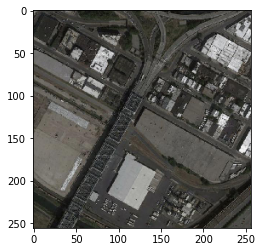

In [ ]:
pyplot.imshow((src_images[1]+1)/2.0)

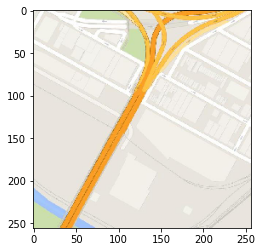

In [ ]:
pyplot.imshow((tar_images[1]+1)/2.0)

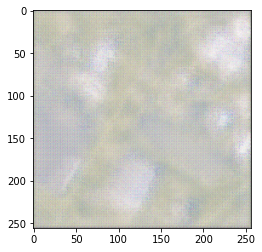

In [ ]:
pyplot.imshow(X.reshape(256,256,3))